<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/diabetes.csv")
df.shape

(768, 9)

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [ ]:
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
X = df[col_names]
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus


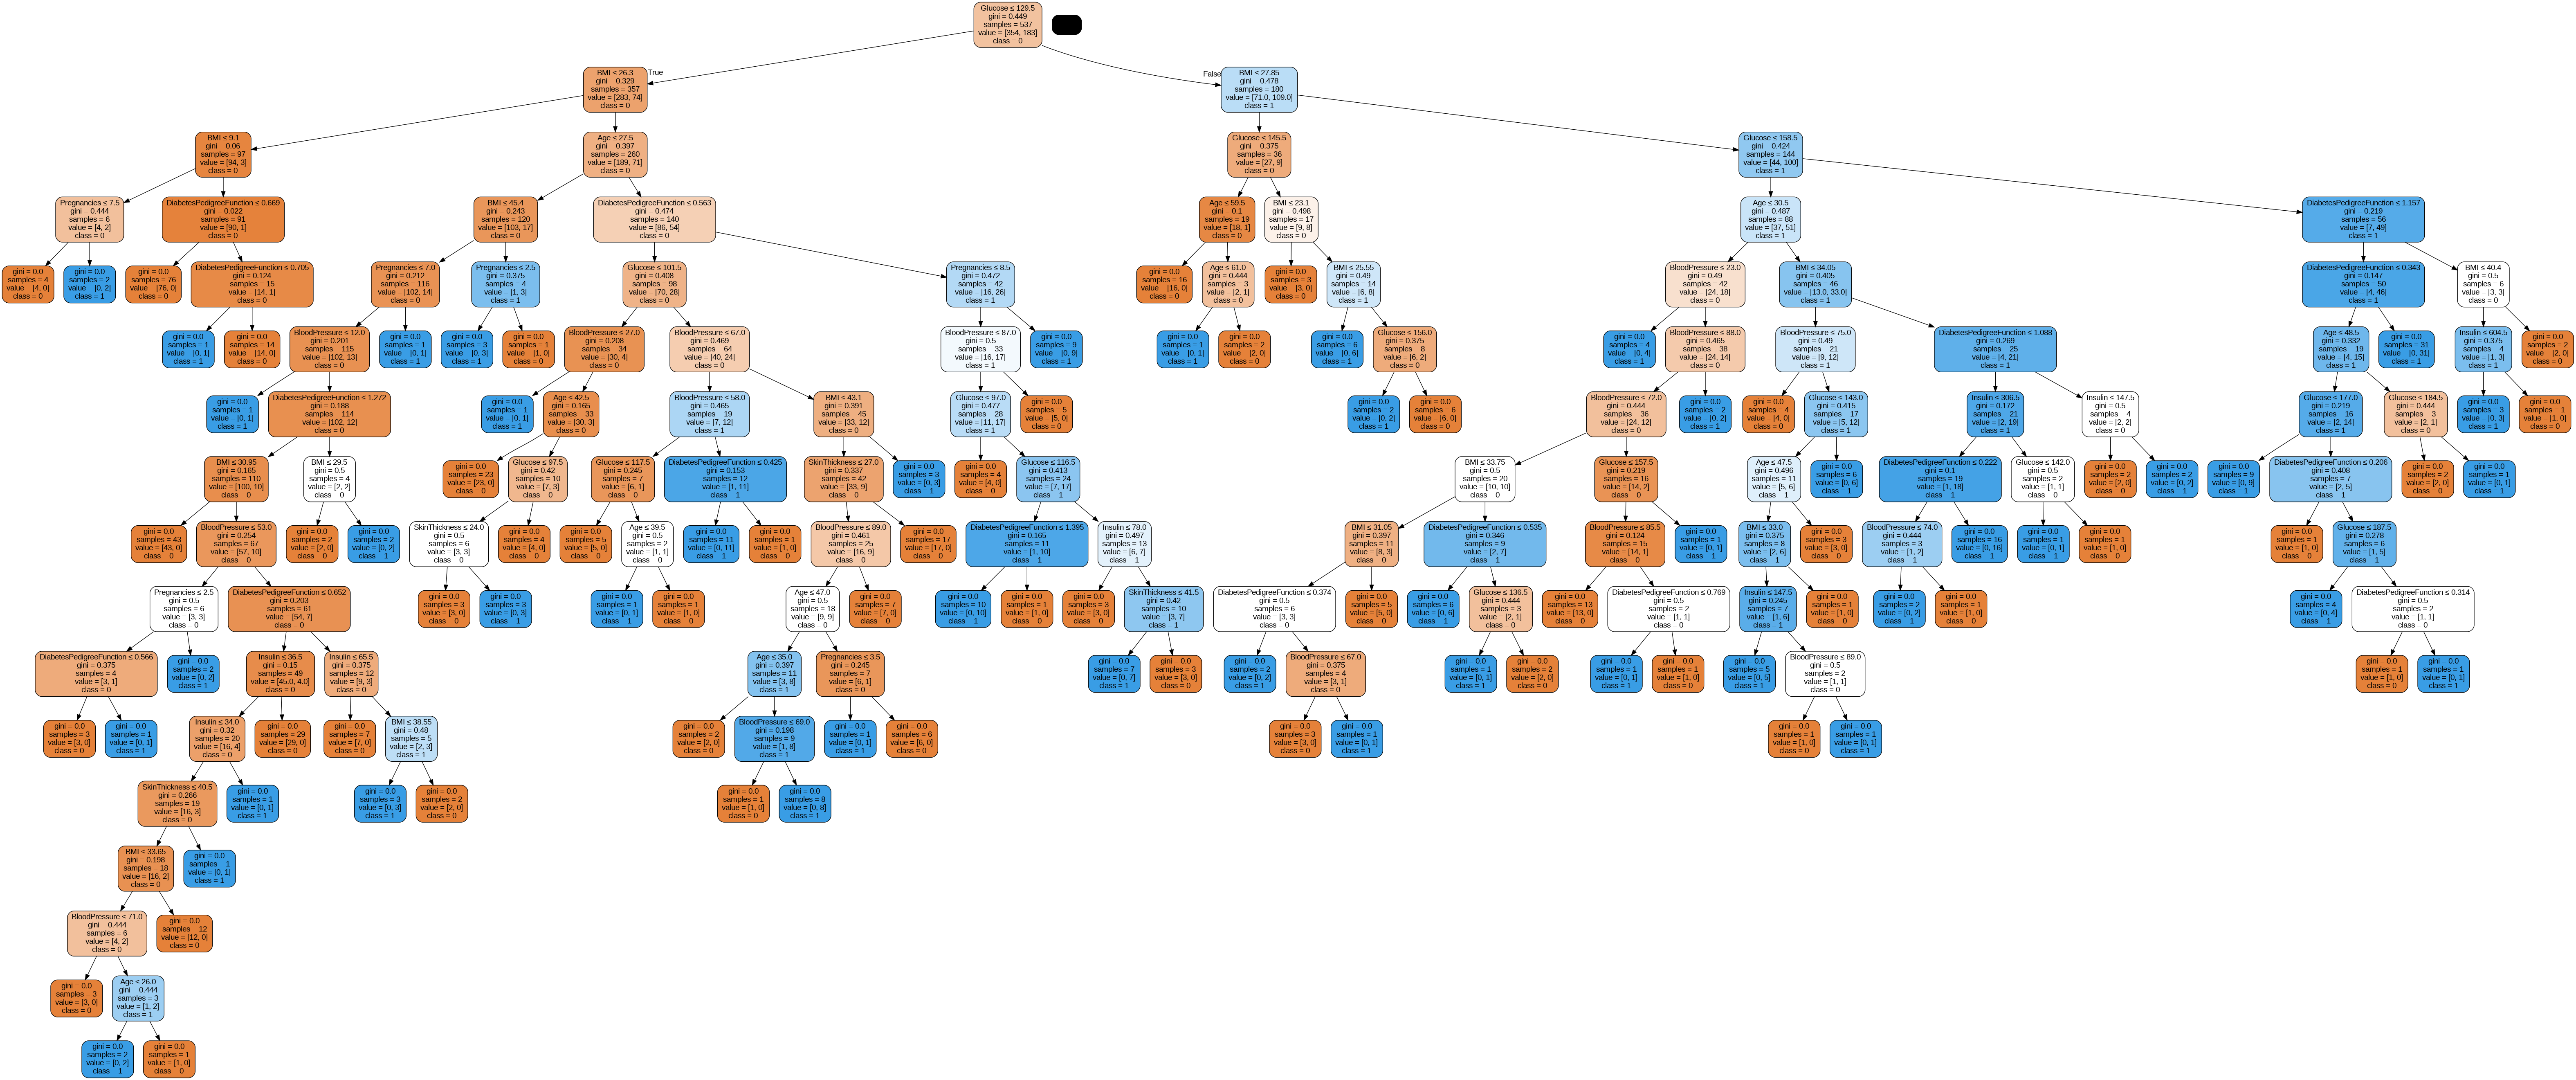

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True, special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [ ]:
clf2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=100)
clf2 = clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)


In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

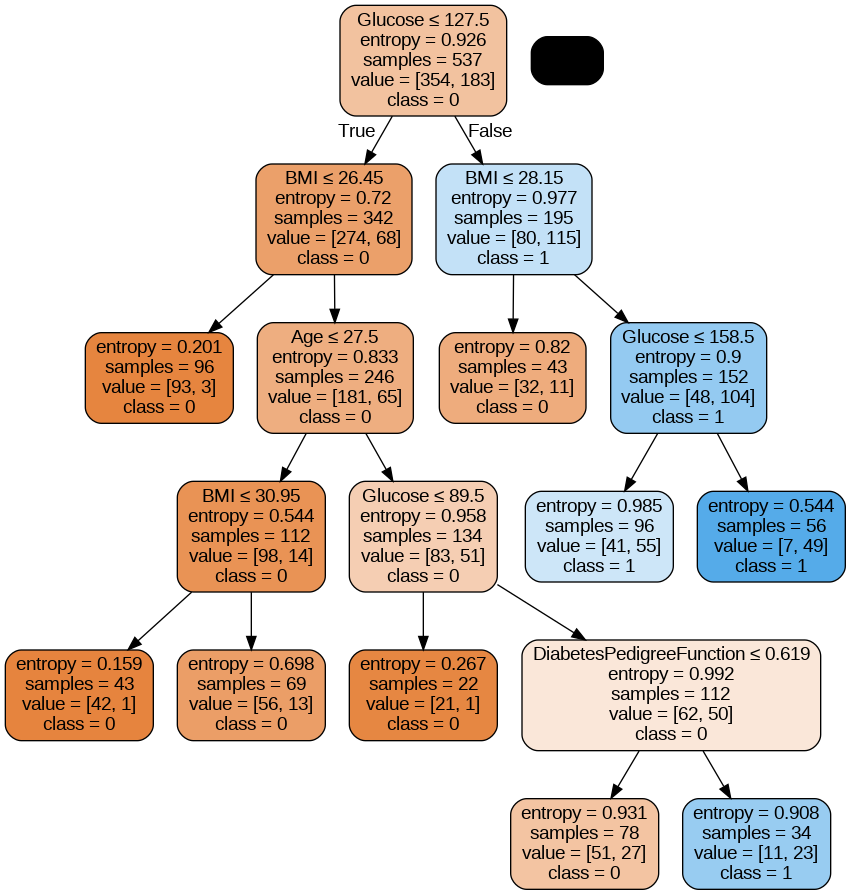

In [ ]:
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,filled=True, rounded=True, special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [5]:
df1=pd.read_csv("/content/Loan_default.csv")

In [11]:
df1=df1.drop("LoanID",axis=1)

In [6]:
df1.shape

(255347, 18)

In [7]:
df1.dtypes

,0
LoanID,object
Age,int64
Income,int64
LoanAmount,int64
CreditScore,int64
MonthsEmployed,int64
NumCreditLines,int64
InterestRate,float64
LoanTerm,int64
DTIRatio,float64


In [8]:
[col for col in df1.columns if df1[col].isnull().sum()>0]

[]

In [9]:
df1=df1.drop_duplicates()

In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
le = LabelEncoder()
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])

In [15]:
X=df1.drop(labels='Default',axis=1)
y=df1['Default']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [20]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8853469094706612
Confusion matrix:
 [[67758    23]
 [ 8760    64]]


In [22]:
df2=pd.read_csv("/content/Breast_cancer_data.csv")

In [23]:
df2.shape

(569, 6)

In [24]:
df2=df2.drop_duplicates()

In [25]:
df2.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [26]:
[col for col in df2.columns if df2[col].isnull().sum()>0]

[]

In [27]:
df2.dtypes

,0
mean_radius,float64
mean_texture,float64
mean_perimeter,float64
mean_area,float64
mean_smoothness,float64
diagnosis,int64


In [28]:
df2.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0
2,19.69,21.25,130.0,1203.0,0.10960,0


In [29]:
X=df2.drop(labels='diagnosis',axis=1)
y=df2['diagnosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.8830409356725146
Precision: 0.9
Recall: 0.9166666666666666


In [32]:
df3=pd.read_csv("/content/Iris.csv")

In [33]:
df3.shape

(150, 6)

In [34]:
df3=df3.drop_duplicates()

In [35]:
[col for col in df3.columns if df3[col].isnull().sum()>0]

[]

In [36]:
df3.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [37]:
df3.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [38]:
X=df3.drop(labels='Species',axis=1)
y=df3['Species']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.78%
